In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load Time Entries Data
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "fct__fortnox_invoices__anonymized.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\fct__fortnox_invoices__anonymized.csv
File size: 64257 bytes


In [3]:
# Load Employee Data
try:
    df_client_invoices = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_client_invoices.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (615, 12)


In [4]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_client_invoices.shape}")
print(f"Columns: {list(df_client_invoices.columns)}")
print(f"Data types:\n{df_client_invoices.dtypes}")
print(f"\nMemory usage: {df_client_invoices.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (615, 12)
Columns: ['invoice_amount_net', 'invoice_amount_total', 'customer_number', 'due_date', 'invoice_date', 'final_pay_date', 'month_name', 'accounting_month', 'accounting_year', 'accounting_year_date', 'broker', 'client_anon']
Data types:
invoice_amount_net      float64
invoice_amount_total    float64
customer_number           int64
due_date                 object
invoice_date             object
final_pay_date           object
month_name               object
accounting_month          int64
accounting_year           int64
accounting_year_date     object
broker                   object
client_anon              object
dtype: object

Memory usage: 303.12 KB


In [5]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_client_invoices.head())

print("\n=== LAST 5 ROWS ===")
display(df_client_invoices.tail())

=== FIRST 5 ROWS ===


,invoice_amount_net,invoice_amount_total,customer_number,due_date,invoice_date,final_pay_date,month_name,accounting_month,accounting_year,accounting_year_date,broker,client_anon
0,52000.0,65000.0,559296,2024-10-15,2024-09-30,NaN,September,5,2024,2024-05-28,NaN,"Mccoy, Singh and Smith"
1,136500.0,170625.0,559298,2024-12-04,2024-11-04,2024-12-04,November,7,2024,2024-07-04,NaN,"Atkinson, Bishop and Cohen"
2,192000.0,240000.0,559298,2025-01-01,2024-11-30,2024-12-30,November,7,2024,2024-07-28,NaN,"Atkinson, Bishop and Cohen"
3,133500.0,166875.0,559298,2025-02-02,2024-12-31,2025-01-31,December,8,2024,2024-08-28,NaN,"Atkinson, Bishop and Cohen"
4,212800.0,266000.0,559298,2025-03-05,2025-01-31,2025-03-05,January,9,2024,2024-09-28,NaN,"Atkinson, Bishop and Cohen"



=== LAST 5 ROWS ===


,invoice_amount_net,invoice_amount_total,customer_number,due_date,invoice_date,final_pay_date,month_name,accounting_month,accounting_year,accounting_year_date,broker,client_anon
610,152000.0,190000.0,559290,2025-03-05,2025-01-31,2025-03-14,January,9,2024,2024-09-28,Partner,Ali-Lawrence
611,160000.0,200000.0,559290,2025-04-03,2025-02-28,2025-04-08,February,10,2024,2024-10-28,Partner,Ali-Lawrence
612,160000.0,200000.0,559290,2025-04-30,2025-03-31,2025-05-09,March,11,2024,2024-11-28,Partner,Ali-Lawrence
613,128000.0,160000.0,559290,2025-06-05,2025-04-30,2025-06-12,April,12,2024,2024-12-28,Partner,Ali-Lawrence
614,144000.0,180000.0,559290,2025-06-30,2025-05-31,2025-07-03,May,1,2025,2025-01-28,Partner,Ali-Lawrence


=== BROKER ANALYSIS: NaN vs Non-NaN by QUARTERS (Corrected) ===
✓ All required columns found!

--- QUARTERLY INVOICE SUMMARY ---


broker_status,Has Broker,No Broker (NaN)
year_quarter,,
2019Q1,3.661725e+05,0.00
2019Q2,1.174650e+06,0.00
2019Q3,1.144052e+06,0.00
2019Q4,9.563125e+05,0.00
2020Q1,8.179925e+05,0.00
2020Q2,1.260905e+06,0.00
2020Q3,2.192095e+06,0.00
2020Q4,2.220563e+06,0.00
2021Q1,2.211484e+06,0.00


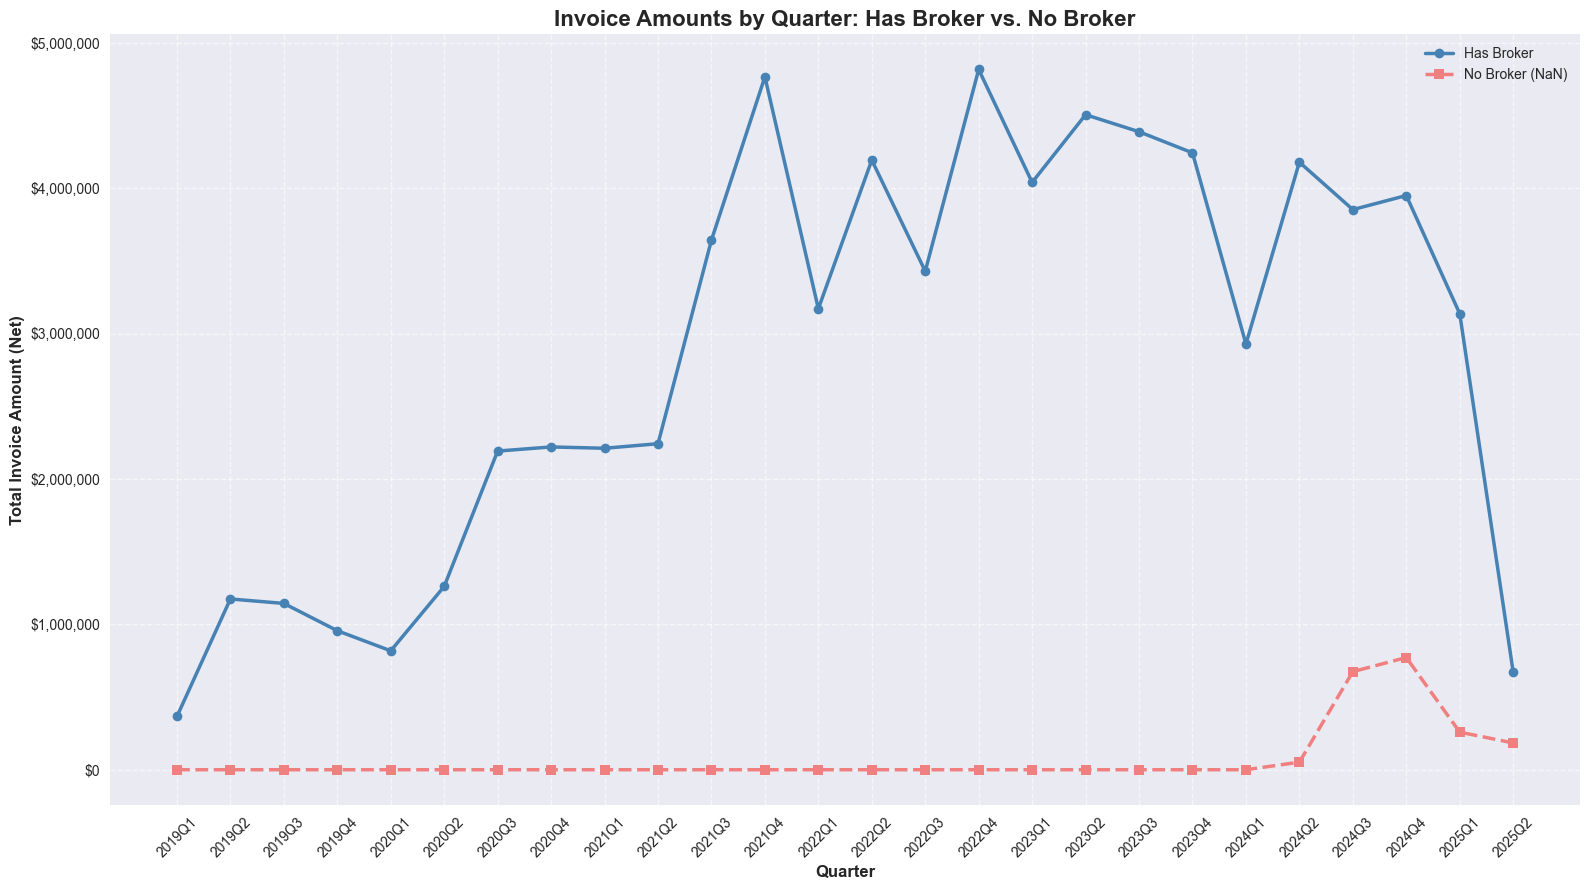

In [13]:
# Broker Analysis - NaN vs Non-NaN by Quarters (Corrected Date Handling)
print("=== BROKER ANALYSIS: NaN vs Non-NaN by QUARTERS (Corrected) ===")

required_cols = ['broker', 'accounting_year_date', 'invoice_amount_net']
if not all(col in df_client_invoices.columns for col in required_cols):
    print(f"❌ Missing required columns. Found: {list(df_client_invoices.columns)}")
else:
    print("✓ All required columns found!")
    analysis_df = df_client_invoices[required_cols].copy()
    analysis_df.dropna(subset=['accounting_year_date', 'invoice_amount_net'], inplace=True)
    
    # 1. Create the broker category column
    analysis_df['broker_status'] = np.where(analysis_df['broker'].isna(), 'No Broker (NaN)', 'Has Broker')
    
    # 2. CORRECTED DATE PROCESSING
    try:
        # Explicitly convert 'accounting_year_date' to datetime.
        # If your date format is different (e.g., day/month/year), change the format string.
        # Common formats:
        # 'YYYY-MM-DD' -> format='%Y-%m-%d'
        # 'DD-MM-YYYY' -> format='%d-%m-%Y'
        # 'MM/DD/YYYY' -> format='%m/%d/%Y'
        analysis_df['invoice_date'] = pd.to_datetime(analysis_df['accounting_year_date'], format='%Y-%m-%d', errors='coerce')
        
        # Check how many dates failed to convert
        failed_conversions = analysis_df['invoice_date'].isna().sum()
        if failed_conversions > 0:
            print(f"⚠️ Warning: {failed_conversions} out of {len(analysis_df)} date values could not be converted and were ignored.")
        
        # Drop rows where date conversion failed
        analysis_df.dropna(subset=['invoice_date'], inplace=True)
        
        if analysis_df.empty:
            raise ValueError("No valid dates found after conversion. Please check the 'accounting_year' format.")

        # Create a year-quarter column for grouping
        analysis_df['year_quarter'] = analysis_df['invoice_date'].dt.to_period('Q').astype(str)
        
        # 3. Group and sum the data
        quarterly_summary = analysis_df.groupby(['year_quarter', 'broker_status'])['invoice_amount_net'].sum().unstack(fill_value=0)
        
        print("\n--- QUARTERLY INVOICE SUMMARY ---")
        display(quarterly_summary)
        
        # 4. Create the line plot
        fig, ax = plt.subplots(figsize=(16, 9))
        
        if 'Has Broker' in quarterly_summary.columns:
            ax.plot(quarterly_summary.index, quarterly_summary['Has Broker'], 
                    label='Has Broker', marker='o', linestyle='-', color='steelblue', linewidth=2.5)
        if 'No Broker (NaN)' in quarterly_summary.columns:
            ax.plot(quarterly_summary.index, quarterly_summary['No Broker (NaN)'], 
                    label='No Broker (NaN)', marker='s', linestyle='--', color='lightcoral', linewidth=2.5)

        ax.set_ylabel('Total Invoice Amount (Net)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Quarter', fontsize=12, fontweight='bold')
        ax.set_title('Invoice Amounts by Quarter: Has Broker vs. No Broker', fontsize=16, fontweight='bold')
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.legend()
        ax.grid(True, which='major', linestyle='--', alpha=0.6)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'${val:,.0f}'))

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"✗ An error occurred: {e}")
        print("Please verify the 'format' parameter in pd.to_datetime matches your actual date format.")


# things to extract:   
- broker deals vs the rest. The great mayority is broker. Is this what they mean when saying that each consultant brings its own deals? 
I thought then that they would be direct, not broker. What else can we decompose here?
- we have the total earnings per month, which can be compared with the costs. Check if there is any other place with money 